In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers
import tensorflow as tf

In [3]:
DIR="C:\\Users\\Tanmay Pajgade\\Desktop\\inter\\cotton_infection_dir_ready\\train"
categories=["bacterial_blight","curl_virus","fussarium_wilt","healthy"]
DIR1="C:\\Users\\Tanmay Pajgade\\Desktop\\inter\\cotton_infection_dir_ready\\test"

In [4]:
training_data = []
IMAGE_SIZE = [150, 150]

def create_training_data():
    for c in categories :
        path=os.path.join(DIR,c)
        class_num = categories.index(c)
        for img in os.listdir(path):
            try :
                img=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img,IMAGE_SIZE)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
            
create_training_data()     


In [65]:
testing_data = []
IMAGE_SIZE = [150, 150]

def create_testing_data():
    for c in categories :
        path=os.path.join(DIR1,c)
        class_num = categories.index(c)
        for img in os.listdir(path):
            try :
                img=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img,IMAGE_SIZE)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
            
            
create_testing_data()     


In [72]:
X_t=[]
y_t=[]

for features,label in testing_data:
    X_t.append(features)
    y_t.append(label)
    
    
X_t=np.array(X_t).reshape(-1,150,150,3) 
X_t=X_t/255
Y_t= tf.keras.utils.to_categorical(y_t, len(categories))

In [72]:
len(X_t)

343

In [73]:
len(Y_t)

343

In [6]:
len(training_data)

1442

In [66]:
import random 
random.shuffle(training_data)

In [67]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,150,150,3)
X=X/255
Y = tf.keras.utils.to_categorical(y, len(categories))

In [74]:
len(X)

1442

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 

In [57]:
model= Sequential(
    [
     layers.Input(shape=(150,150,3)),
     layers.Conv2D(32,kernel_size=(3,3),activation ="relu"),  
     layers.MaxPooling2D(2,2),
     layers.Dropout(0.25),    
    
     layers.Conv2D(64,kernel_size=(3,3),activation ="relu"),  
     layers.MaxPooling2D(2,2),
     layers.Dropout(0.25), 
        
     layers.Conv2D(64,kernel_size=(3,3),activation ="relu"),   
     layers.MaxPooling2D(2,2),
     layers.Dropout(0.25),   
        
     layers.Conv2D(128,kernel_size=(3,3),activation ="relu"),   
     layers.MaxPooling2D(2,2),
     layers.Dropout(0.25), 
        
     layers.Conv2D(128,kernel_size=(3,3),activation ="relu"),   
     layers.MaxPooling2D(2,2),
     layers.Dropout(0.25), 
        
     layers.Flatten(),
     layers.Dropout(0.5),   
     layers.Dense(4,activation="softmax")
     

    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 64)       

In [58]:
mod.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [75]:
h=mod.fit(X, Y, batch_size=64,
         validation_split=0.1, epochs=5)

Epoch 1/5
21/21 [==============================] - 125s 6s/step - loss: 0.2224 - accuracy: 0.9106 - val_loss: 0.2558 - val_accuracy: 0.8828
Epoch 2/5
21/21 [==============================] - 135s 6s/step - loss: 0.1458 - accuracy: 0.9491 - val_loss: 0.1894 - val_accuracy: 0.9172
Epoch 3/5
21/21 [==============================] - 131s 6s/step - loss: 0.1192 - accuracy: 0.9584 - val_loss: 0.2650 - val_accuracy: 0.8621
Epoch 4/5
21/21 [==============================] - 130s 6s/step - loss: 0.0976 - accuracy: 0.9630 - val_loss: 0.1493 - val_accuracy: 0.9379
Epoch 5/5
21/21 [==============================] - 126s 6s/step - loss: 0.1113 - accuracy: 0.9614 - val_loss: 0.1862 - val_accuracy: 0.9241


In [76]:
test_loss,test_acc = mod.evaluate(X_t,Y_t)

11/11 [==============================] - 5s 473ms/step - loss: 0.2792 - accuracy: 0.9096


In [80]:
mod.history

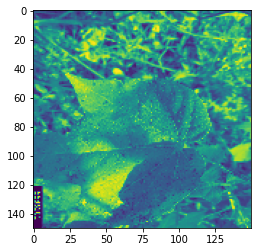

In [26]:
plt.imshow(X[1])

In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in vgg.layers:
  layer.trainable = False

In [13]:
m = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(m)
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [49]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [50]:
l=model.fit(X,Y,validation_split=0.1,batch_size=128,epochs=5)

Epoch 1/5
11/11 [==============================] - 274s 25s/step - loss: 6.1617 - accuracy: 0.6862 - val_loss: 1.2817 - val_accuracy: 0.9172
Epoch 2/5
11/11 [==============================] - 293s 27s/step - loss: 0.5794 - accuracy: 0.9553 - val_loss: 1.3530 - val_accuracy: 0.9310
Epoch 3/5
11/11 [==============================] - 295s 27s/step - loss: 0.1144 - accuracy: 0.9861 - val_loss: 0.6622 - val_accuracy: 0.9586
Epoch 4/5
11/11 [==============================] - 295s 27s/step - loss: 3.2173e-05 - accuracy: 1.0000 - val_loss: 0.5698 - val_accuracy: 0.9655
Epoch 5/5
11/11 [==============================] - 302s 28s/step - loss: 2.3378e-06 - accuracy: 1.0000 - val_loss: 0.5600 - val_accuracy: 0.9655


In [74]:
test_loss,test_acc = model.evaluate(X_t,Y_t)

11/11 [==============================] - 52s 5s/step - loss: 0.7468 - accuracy: 0.9563
